<a href="https://colab.research.google.com/github/fhizal/IMDB_positive-negative_Sentence/blob/main/6_8_Ham_IMDB_Verilerini_%C4%B0%C5%9Flenmesi_Olumlu_Olumsuz_Yorumlar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

imdb_dir = '/content/drive/MyDrive/Colab Notebooks/IMDBHamVeri/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels=[]
texts=[]

In [ ]:
# buradaki islem cok uzun surdugu icin, sonuclari dosya 
# olarak olusturup dosyadan degiskenlere atamasini yaptim

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f= open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [ ]:

"""flabels= open('/content/drive/MyDrive/Colab Notebooks/IMDBHamVeri/aclImdb/labels.txt')
ftexts= open('/content/drive/MyDrive/Colab Notebooks/IMDBHamVeri/aclImdb/texts.txt')

labels=[]
texts=[]

temp=[]
for i in flabels:
  temp.append(i)
for i in temp[0].split():
  labels.append(i)

temp2 = []
for i in ftexts:
  temp2.append(i)
for i in temp2[0].split():
  texts.append(i)

flabels.close()
ftexts.close()"""

6.9 Ham IMDB veri setini metinlerini tokenlerine ayirmak

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
maxlen= 100
training_samples = 200
validation_samples= 10000
max_words = 10000

In [ ]:
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index=tokenizer.word_index
print('Bulunan % unik tokenler.' % len(word_index))

data= pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Data tensorun shapi: ', data.shape)
print('Data label shapi: ', labels.shape)

Bulunan  61358nik tokenler.
Data tensorun shapi:  (12198, 100)
Data label shapi:  (12198,)


In [ ]:
#print(type(word_index))
#print(word_index['the'])
data[2]

In [ ]:
labels[2]

In [ ]:
print(len(sequences[1]))
print(len(texts[1]))
# print(type(sequences))

In [ ]:
texts[0]

In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [ ]:
print(len(indices))

In [ ]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

GloVe kelime gömülmelerinin ayrıştırılması

In [ ]:
glove_dir = '/content/drive/MyDrive/Colab Notebooks/glove'

embeddings_index={}

f= open(os.path.join(glove_dir, 'glove.6B.100d.txt'))

for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:],dtype='float32')
  embeddings_index[word]=coefs

f.close()

print('found %s word vectors' % len(embeddings_index))

found 400000 word vectors


In [ ]:
# Kelime matrislerinin ayrılması

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [ ]:
# Model tanimi


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()

model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
# Modelin egitilmesi ve dogrulamasi

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])



In [ ]:
history = model.fit(x_train,y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val, y_val)) #6.14'teki kod hata veriyor. Ayni kod 206. sayfada da var calisiyor.

Epoch 1/10
7/7 [==============================] - 2s 247ms/step - loss: 2.2349e-06 - acc: 1.0000 - val_loss: 2.7268e-06 - val_acc: 1.0000
Epoch 2/10
7/7 [==============================] - 1s 128ms/step - loss: 4.5514e-07 - acc: 1.0000 - val_loss: 1.4634e-06 - val_acc: 1.0000
Epoch 3/10
7/7 [==============================] - 1s 226ms/step - loss: 2.4861e-07 - acc: 1.0000 - val_loss: 9.3919e-07 - val_acc: 1.0000
Epoch 4/10
7/7 [==============================] - 1s 227ms/step - loss: 1.5822e-07 - acc: 1.0000 - val_loss: 6.7606e-07 - val_acc: 1.0000
Epoch 5/10
7/7 [==============================] - 1s 226ms/step - loss: 1.1177e-07 - acc: 1.0000 - val_loss: 4.9898e-07 - val_acc: 1.0000
Epoch 6/10
7/7 [==============================] - 1s 117ms/step - loss: 8.0880e-08 - acc: 1.0000 - val_loss: 3.9251e-07 - val_acc: 1.0000
Epoch 7/10
7/7 [==============================] - 1s 227ms/step - loss: 6.2355e-08 - acc: 1.0000 - val_loss: 3.1293e-07 - val_acc: 1.0000
Epoch 8/10
7/7 [==================

In [ ]:
model.save_weights('pre_trained_glove_model_h5')

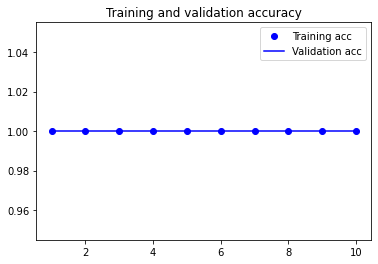

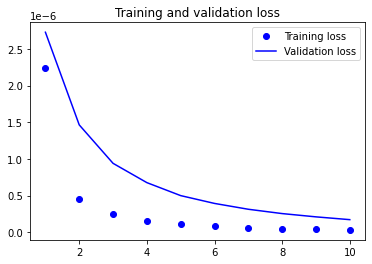

In [ ]:
# Sonuclarin cizdirilmesi

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Onegitimli kelime gömçlmeleri olmadan ayni modeli egitmek

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 2s 155ms/step - loss: 0.4300 - acc: 0.9400 - val_loss: 0.0824 - val_acc: 1.0000
Epoch 2/10
7/7 [==============================

In [ ]:
# Test verisini tokenlara ayirmak
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)

x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

KeyboardInterrupt: ignored

In [ ]:
# test verilerinin degerlendirilmesi
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

In [ ]:
state_t = 0
for input_t in input_sequence:
  output_t = f(input_t, state_t)
  state_t = output_t

In [ ]:
state = 0

for input_t in input_sequence:
  output_t = f(input_t, state_t)
  state_t = output_t

In [ ]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)
output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

In [ ]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()